In [35]:
from sampling.smc import Sampler
import jax
import jax.numpy as jnp

kb = 1.38e-23

temp_init = 1000.0 #* kb
temp_final = 1.0 #* kb

class StandardNormal():
    """Standard Normal distribution in d dimensions"""

    def __init__(self, d):
        self.d = d
        self.grad_nlogp = jax.value_and_grad(self.nlogp)

    def nlogp(self, x):
        """- log p of the target distribution"""
        return 0.5 * jnp.sum(jnp.square(x), axis= -1)

    def prior_draw(self, key):
        return jax.random.normal(key, shape = (self.d, ), dtype = 'float64') * jnp.sqrt(temp_init) #start from the distribution at high temperature


target = StandardNormal(d = 10)

sampler = Sampler(target)

x = sampler.sample(steps_at_each_temp = 1000, tune_steps= 100, num_chains= 1000, temp_init=temp_init, temp_final=temp_final, ess=0.8)

print(x)

T: 792.3941650390625
T: 630.202880859375
T: 501.9044189453125
T: 399.2867736816406
T: 312.9793395996094
T: 237.50889587402344
T: 171.2333526611328
T: 120.62891387939453
T: 86.4601058959961
T: 62.676361083984375
T: 45.69123458862305
T: 33.49421691894531
T: 24.919424057006836
T: 19.04027557373047
T: 14.815227508544922
T: 11.521739959716797
T: 8.798320770263672
T: 6.585391998291016
T: 4.964160919189453
T: 3.821366310119629
T: 2.997537136077881
T: 2.338393211364746
T: 1.8115662336349487
T: 1.433294653892517
T: 1.1346603631973267
T: 1.0
[[-1.0116847e+00 -1.7553035e-02  4.8693377e-01 ... -1.7412001e+00
   5.0347769e-01  6.1165594e-02]
 [-3.9931923e-01  9.7024775e-01  2.4949505e+00 ... -7.3303711e-01
  -1.6457158e+00  1.4856802e+00]
 [ 1.0561962e+00  1.4732511e+00  1.8438959e+00 ... -1.3079011e+00
  -8.2805663e-01 -7.8995615e-01]
 ...
 [-3.4237647e-01 -2.4359441e+00  5.3879017e-01 ... -2.6331550e-01
  -6.4410758e-04 -4.5144773e-01]
 [ 1.3549638e-01 -5.5181581e-01 -8.6637658e-01 ...  6.4415979

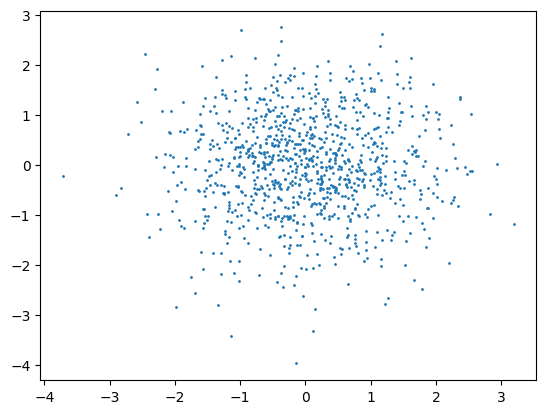

In [36]:
import matplotlib.pyplot as plt 

plt.scatter(x[:,0], x[:,1], s=1);

In [37]:
jnp.std(x, axis=0)

Array([1.0309705 , 0.9962417 , 0.97341913, 1.0280023 , 1.0024923 ,
       0.9671759 , 0.99605405, 1.0076613 , 1.0228103 , 0.997725  ],      dtype=float32)

In [38]:
jnp.var(x, axis=0)

Array([1.0629001 , 0.99249744, 0.94754475, 1.0567886 , 1.0049908 ,
       0.9354292 , 0.9921237 , 1.0153813 , 1.0461409 , 0.9954552 ],      dtype=float32)